In [299]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## EF5058 HW1 
EID 58555905 LAM Chun Ming 

Full File found here: https://github.com/Toby3220/EF-5058 

### Q1) For Equity Market Neutral (EqMktNtr), run the following regression: a multivariate regression on the market (MktRf), size (SMB), value (HML), profitability (RMW), and investment (CMA) factors

In [300]:
#Importing Data

data = pd.read_csv("Performance.csv")

#format Date to Datetime
data["Date"] = pd.to_datetime(data["Date"],format="%Y-%m-%d")
data.set_index("Date",inplace=True)

data.columns

Index(['LnShEq', 'EqMktNtr', 'DedShBs', 'GlobalMac ', 'MngdFut ', 'EmgMkts',
       'EvntDrvn ', ' CnvrtArb ', 'FxIncArb ', 'HFIndex', 'LRF', 'MktRF',
       'SMB', 'HML', 'RMW', 'CMA', 'UMD', 'BondMkt', 'CreditS', 'PTFSBD',
       'PTFSFX', 'PTFSCOM', 'LiqPS', 'LiqSadka', 'AlphaQuest', 'Transtrend',
       'VFINX', 'VEXMX', 'NAESX', 'VVIAX', 'VBINX', 'VIMSX', 'VISGX', 'VISVX',
       'MTUM', 'TSMOM', 'TSMOMCM', 'TSMOMEQ', 'TSMOMFI', 'TSMOMFX'],
      dtype='object')

In [301]:
# working data group
wdata = data.loc[:,["EqMktNtr","MktRF","SMB","HML","RMW","CMA"]]
wdata.dropna(0,inplace=True)

# creating X,y Datasets, inserting intercept
y = wdata.pop("EqMktNtr")
X = wdata
X["Intercept"] = 1
# Running OLS Regression 
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:               EqMktNtr   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     8.466
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.45e-07
Time:                        00:45:24   Log-Likelihood:                 805.10
No. Observations:                 346   AIC:                            -1598.
Df Residuals:                     340   BIC:                            -1575.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.1159      0.033      3.557      0.0

#### 1.1 & 1.2) Interpret the significance of alphas and betas in the regression. Based on the sign of estimated betas, can we say something about the general characteristics of the underlying portfolios?

Firstly, $R^2$ score of the regression is low, this suggest that a large part of the varience is not explained by current factors

$\alpha$ (the intercept) is significant with a p value of 0.02% although the size of the alpha is modest but positive, at 0.31% per month (3.8% annual). However this might be unreliable as with the low $R^2$ score suggest missing factors, and regression intercept could change when they are included

$\beta_{MktRF} \  \& \ \beta_{HML}$ are the most signficant, with relatively low but positive exposures in both at 0.11 and 0.21 respectively. This means that there portfolio do have a slight preference towards "Value" stocks and do have very limtied market risk exposure. (exposure of 0.11 and 0.21 means that portfolio returns are expected to increase by 0.11% and 0.21% per 1% point increase in the Market Risk Premium and Value factor respectively)

The portfolio is slightly negatively exposed to the investment factor $\beta_{CMA}$ (-0.18, P value at 2.5%) this suggests slight preference to capital intensive companies

Lastly portfolio exposure to $\beta_{RWM}$ is only signifcant at 10+% level and sligthly negative (an occational tendency to favor low "profitability" companies), and has no exposure to $\beta_{SMB}$ (both statistically insignificant and small magnitude of exposure) 

Note factor exposure analysis only shows statistical exposure/ preference, and does not nessicarly represent actual portfolio exposure/ preference. 


####   1.3) What is EqMktNtr's monthly information ratio if we use the above five factors to calculate the benchmark?

In [302]:
def visualise_rets(port_ret,bench_ret, type:int = 0, name:str = None):
    diff_ret = port_ret-bench_ret

    port = port_ret+1
    bench = bench_ret+1
    diff = diff_ret+1

    port_cumret = port.cumprod(0)
    bench_cumret = bench.cumprod(0)
    
    if type == 0:
        plt.plot(port_cumret)
        plt.plot(bench_cumret)
        plt.title("Cumulative Portfolio Returns: {} Entire Period".format(name))
        plt.legend(["Portfolio","Factor Portfolio"])
        print("Information Ratio for the Entire Period: {}".format(round(diff_ret.mean()/diff_ret.std(),4)))

    if type == 1:
        plt.plot(port_cumret.loc[:"2008-06-01"]/port_cumret.loc[:"2008-06-01"][0])
        plt.plot(bench_cumret.loc[:"2008-06-01"]/bench_cumret.loc[:"2008-06-01"][0])
        plt.title("Cumulative Portfolio Returns: {} Pre Financial Crisis".format(name))
        plt.legend(["Portfolio","Factor Portfolio"])
        print("Information Ratio Pre Financial Crisis: {}".format(round(diff_ret[:"2008-06-01"].mean()/diff_ret[:"2008-06-01"].std(),4)))

    if type ==2:
        plt.plot(port_cumret.loc["2009-01-01":]/port_cumret.loc["2009-01-01":][0])
        plt.plot(bench_cumret.loc["2009-01-01":]/bench_cumret.loc["2009-01-01":][0])
        plt.title("Cumulative Portfolio Returns: {} Post 2009".format(name))
        plt.legend(["Portfolio","Factor Portfolio"])
        print("Information Ratio Post 2009: {}".format(round(diff_ret["2009-01-01":].mean()/diff_ret["2009-01-01":].std(),4)))

Information Ratio for the Entire Period: 0.1317


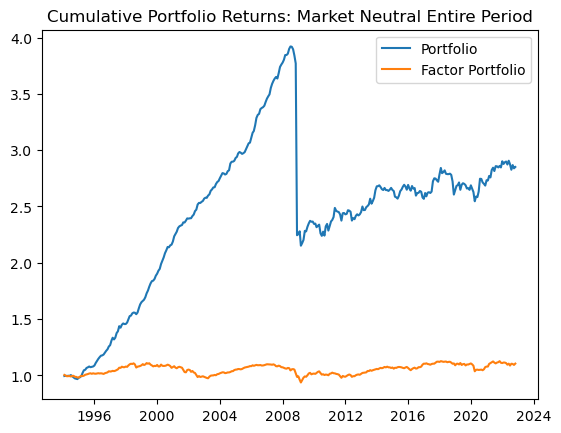

In [303]:
factor_params = res.params.copy()
factor_params["Intercept"] = 0
factor_params

bench_ret = pd.Series(mod.predict(factor_params,X),index=y.index)
port_ret = y

visualise_rets(port_ret,bench_ret,0,"Market Neutral")

Visualising the data shows that there is a fundamental difference between pre and post financial crisis portfolio performances, this suggest a need for separate analysis for each period

Information Ratio Pre Financial Crisis: 0.8411


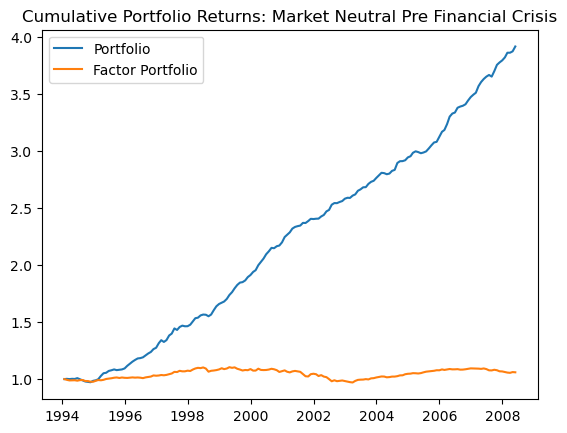

In [304]:
visualise_rets(port_ret,bench_ret,1,"Market Neutral")

Information Ratio Post 2009: 0.0593


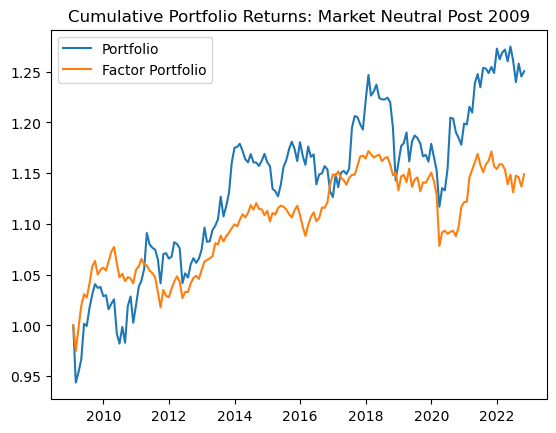

In [305]:
visualise_rets(port_ret,bench_ret,2,"Market Neutral")

Portfolio "alpha" has disspeared after financial crisis (assuming regressed factors over the entire period), and is reflected in the Information Ratio

### 2) For Equity Long/Short (LnShEq), run the following two regressions: (i) a univariate regression on the market factor; (ii) a multivariate regression on the market, size, value, and momentum (UMD) factor.

In [306]:
# Single Factor Regression

wdata2 = data.loc[:,["LnShEq","MktRF","SMB","HML","UMD"]]
wdata2.dropna(0,inplace=True)

y2 = wdata2.pop("LnShEq")
wdata2["Intercept"]=1
X2 = wdata2.loc[:,["MktRF","Intercept"]]

mod = sm.OLS(y2,X2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnShEq   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     442.6
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           9.43e-64
Time:                        00:45:24   Log-Likelihood:                 920.26
No. Observations:                 346   AIC:                            -1837.
Df Residuals:                     344   BIC:                            -1829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.4251      0.020     21.038      0.0

In [307]:
# Full Regression

X2=wdata2
mod = sm.OLS(y2,X2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 LnShEq   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     199.8
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           4.94e-88
Time:                        00:45:24   Log-Likelihood:                 986.01
No. Observations:                 346   AIC:                            -1962.
Df Residuals:                     341   BIC:                            -1943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.4408      0.018     23.996      0.0

#### 2.1) Interpret the significance of the multivariate alpha and the alpha from the univariate market regression. Discuss the difference between these two alphas. Based on your own research of the availability of equity momentum-style products, do you think the equity long/short strategy should be rewarded for its exposure to UMD?


Alpha is reduced from 0.35% to 0.27% (4.3% to 3.3% annaul), but still signiicant for both. This is due to the introduction of other factors that explains a portion of the alpha, nad is common phenomemon.

There is also significant Momentum factor exposure (statistical, and in magnitude) at 0.14. As Long Short Stratergies are typcally Long Biased, it can have significant Momentum Factor Exposures. This is different to Market Neutral where exposure to (Long) Momentum cancels out (Short) momentum in terms of factor exposure (this is reflected in the regression of our Market Neutral dataset UMD = 0.018; p val = 0.52 for Market Neutral)

Mometum style products is only avaliable at high costs, so from a market effiecient and risk exposure framework, it could be rewarded if the execution of the straterigy is sufficiently difficult. 

Information Ratio for the Entire Period: 0.1943


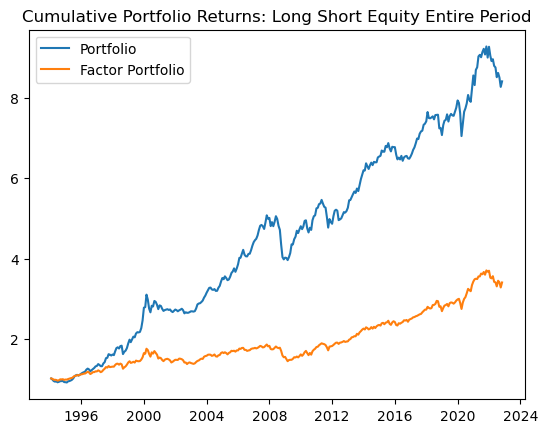

In [308]:
factor_params = res.params.copy()
factor_params["Intercept"] = 0
factor_params

bench_ret = pd.Series(mod.predict(factor_params,X2),index=y.index)
port_ret = y2

visualise_rets(port_ret,bench_ret,0,"Long Short Equity")

Information Ratio Pre Financial Crisis: 0.446


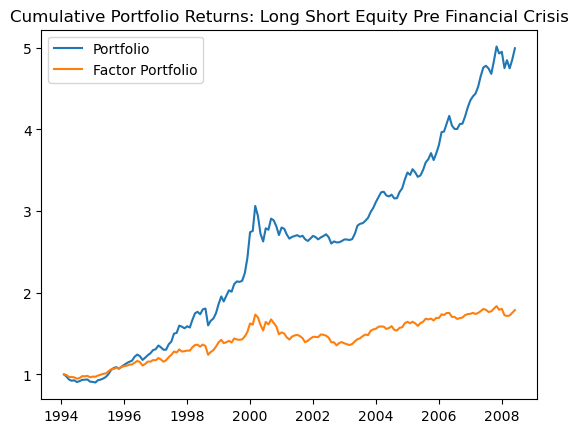

In [309]:
visualise_rets(port_ret,bench_ret,1,"Long Short Equity")

Information Ratio Post 2009: -0.0222


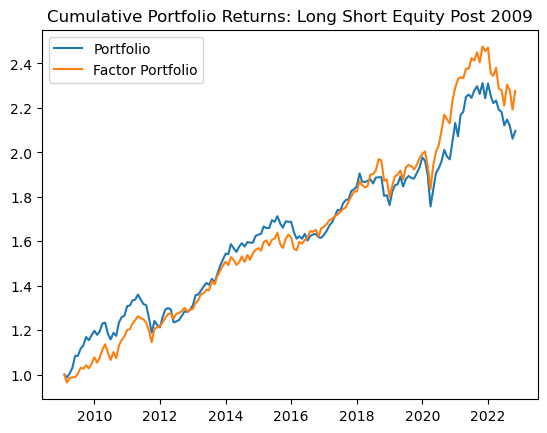

In [310]:
visualise_rets(port_ret,bench_ret,2,"Long Short Equity")

Portfolio "alpha" has disspeared after financial crisis (assuming regressed factors over the entire period), and is reflected in the Information Ratio

### 3) For Equity Market Neutral (EqMktNtr) and Dedicated Short Bias (DedShBs), report the results of regressing their excess returns on the current, one-month-lagged, two-month-lagged, and three-month-lagged market factor:

In [335]:
wdata3 = data.loc[:,["EqMktNtr","DedShBs","MktRF"]]
wdata3["Intercept"]=1

wdata3["MktRF_L1"] = wdata3["MktRF"].shift(1)
wdata3["MktRF_L2"] = wdata3["MktRF"].shift(2)
wdata3["MktRF_L3"] = wdata3["MktRF"].shift(3)


wdata3.dropna(0,inplace=True)

X31=wdata3.loc[:,["Intercept","EqMktNtr","MktRF","MktRF_L1","MktRF_L2","MktRF_L3"]]
y31=X31.pop("EqMktNtr")

X32=wdata3.loc[:,["Intercept","DedShBs","MktRF","MktRF_L1","MktRF_L2","MktRF_L3"]]
y32=X32.pop("DedShBs")

mod31 = sm.OLS(y31,X31)
res31 = mod31.fit()
print(res31.summary())


                            OLS Regression Results                            
Dep. Variable:               EqMktNtr   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     13.49
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.29e-10
Time:                        00:48:27   Log-Likelihood:                 801.98
No. Observations:                 343   AIC:                            -1594.
Df Residuals:                     338   BIC:                            -1575.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0013      0.001      0.957      0.3

In [336]:
mod32 = sm.OLS(y32,X32)
res32 = mod32.fit()
print(res32.summary())

                            OLS Regression Results                            
Dep. Variable:                DedShBs   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.05e-72
Time:                        00:48:49   Log-Likelihood:                 690.74
No. Observations:                 343   AIC:                            -1371.
Df Residuals:                     338   BIC:                            -1352.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.002      0.202      0.8

Information Ratio for the Entire Period: 0.0115


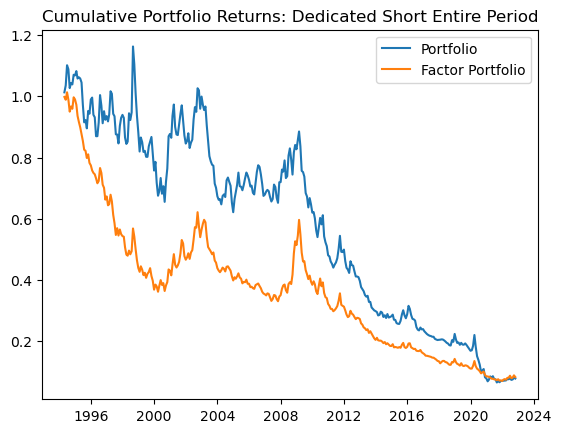

In [346]:
factor_params = res32.params.copy()
factor_params["Intercept"] = 0
factor_params


bench_ret = pd.Series(mod32.predict(factor_params,X32),index=y32.index)
port_ret = y32


visualise_rets(port_ret,bench_ret,0,"Dedicated Short")

Information Ratio for the Entire Period: 0.0543


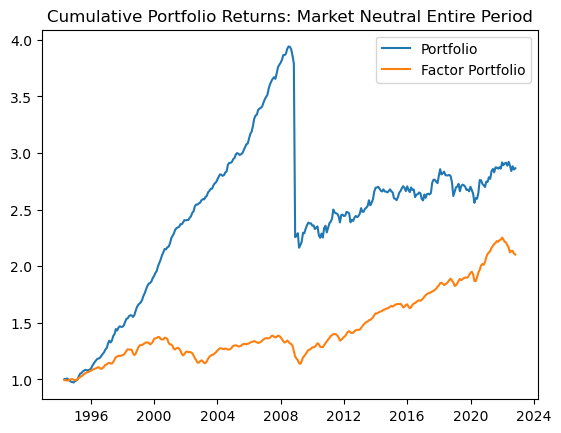

In [347]:
factor_params = res31.params.copy()
factor_params["Intercept"] = 0
factor_params

bench_ret = pd.Series(mod31.predict(factor_params,X31),index=y31.index)
port_ret = y31

visualise_rets(port_ret,bench_ret,0,"Market Neutral")


####  3.1) Discuss the significance of the factor loadings. Can you say something about the liquidity of the underlying portfolios of these two strategies? 

For Market Neutral;  $\beta_{MktRF}, \ \beta_{MktRF\ L1} \ \&\  \beta_{MktRF\ L2}$ Factors are significant at the 5% level , whilst for the Dedicated Short Bias only $\beta_{MktRF}$ is significant at the 5% level. This indicates that the Market Neutral Stratergy are more illiquid as it demonstrate a delayed marking to market, smoothing the resutls to make results appear better when updating portfolio values

The the risks and limitation of a dedicated short stratergy means, that they can be more liquid, than a market neutral stratergy. This is because there can be high barrier (borrowing avalibilty, borrowing costs and transaction fees) and liquidty risks (trading induced price movement, short sqeeze risks) for illiquid names; whist market neutral stratergy can take long positions in more illiquid names. Furthermore, it is also fundamentally harder to take long term short positions which should lead to quickly realised gains and losses/ & higher turn overs.









## Appendix: Disapearing Alphas Post Financial Crisis
**most alphas Disappeared post 2009**... Why? talent drain/ culture shift in big banks? (not clear if this is data from credit suisse internal desks or industry wide) industry overcrowding? new wave quants eating everyone's lunch? 

In [315]:
wdata = data.loc[:,["MktRF","SMB","HML","RMW","CMA","UMD"]]
wdata["MktRF_L1"] = wdata["MktRF"].shift(1)
wdata["MktRF_L2"] = wdata["MktRF"].shift(2)
wdata["MktRF_L3"] = wdata["MktRF"].shift(3)
wdata["Intercept"] = 1

X_EMN = wdata.copy()
X_EMN["EqMktNtr"] = data.loc[:,"EqMktNtr"]
X_EMN.dropna(inplace=True)
y_EMN = X_EMN.pop("EqMktNtr")

X_DSB = wdata.copy()
X_DSB["DedShBs"] = data.loc[:,"DedShBs"]
X_DSB.dropna(inplace=True)
y_DSB = X_DSB.pop("DedShBs")

X_ELS = wdata.copy()
X_ELS["LnShEq"] = data.loc[:,"LnShEq"]
X_ELS.dropna(inplace=True)
y_ELS = X_ELS.pop("LnShEq")

X_ELS = wdata.copy()
X_ELS["LnShEq"] = data.loc[:,"LnShEq"]
X_ELS.dropna(inplace=True)
y_ELS = X_ELS.pop("LnShEq")

X_GMC = wdata.copy()
X_GMC["GlobalMac "] = data.loc[:,"GlobalMac "]
X_GMC.dropna(inplace=True)
y_GMC = X_GMC.pop("GlobalMac ")

X_EME = wdata.copy()
X_EME["EmgMkts"] = data.loc[:,"EmgMkts"]
X_EME.dropna(inplace=True)
y_EME = X_EME.pop("EmgMkts")



In [316]:
def fit_period(y,X,type: int = 0, name: str=None):
    d1 = "2008-06-01"
    d2 = "2009-01-01"

    if type == 0:
        mod = sm.OLS(y,X)
        y_ret = y

    if type == 1:
        mod = sm.OLS(y[:d1],X.loc[:d1,:])
        y_ret = y[:d1]


    if type ==2:
        mod = sm.OLS(y[d2:],X.loc[d2:,:])
        y_ret = y[d2:]

    res = mod.fit()
    print(res.summary())

    params = res.params.copy() 
    params["Intercept"] = 0
    bench_ret = pd.Series(mod.predict(params,X),index=y.index)

    params = res.params.copy()
    params.loc[["MktRF_L1","MktRF_L2","MktRF_L3"]]=res.pvalues.loc[["MktRF_L1","MktRF_L2","MktRF_L3"]]
    return y_ret, bench_ret, params




#### Equity Market Neutral

                            OLS Regression Results                            
Dep. Variable:               EqMktNtr   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2.670
Date:                Mon, 24 Feb 2025   Prob (F-statistic):            0.00650
Time:                        00:45:26   Log-Likelihood:                 591.56
No. Observations:                 170   AIC:                            -1163.
Df Residuals:                     160   BIC:                            -1132.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.0772      0.019      4.030      0.0

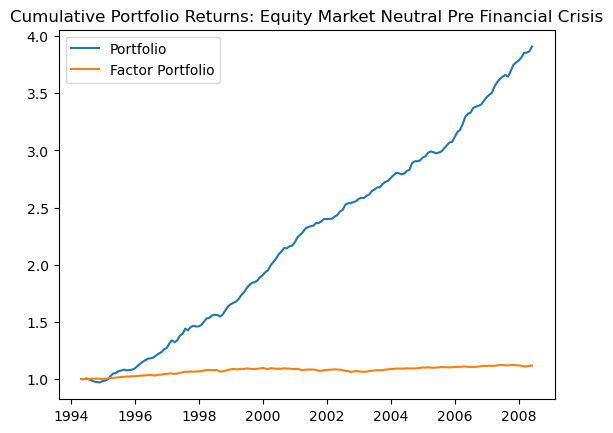

In [317]:
# Pre FC
y_ret_d1, EMN_bench_ret_d1, EMN_params_d1 = fit_period(y_EMN,X_EMN,1,"Equity Market Neutral")

visualise_rets(y_EMN,EMN_bench_ret_d1,1,"Equity Market Neutral")

                            OLS Regression Results                            
Dep. Variable:               EqMktNtr   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     6.097
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.51e-07
Time:                        00:45:26   Log-Likelihood:                 493.42
No. Observations:                 166   AIC:                            -966.8
Df Residuals:                     156   BIC:                            -935.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.1661      0.025      6.540      0.0

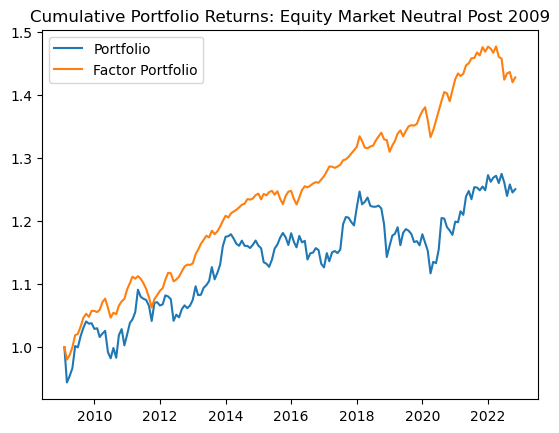

In [318]:
# Post 2009
y_ret_d1, EMN_bench_ret_d2, EMN_params_d2 = fit_period(y_EMN,X_EMN,2,"Equity Market Neutral")

visualise_rets(y_EMN,EMN_bench_ret_d2,2,"Equity Market Neutral")

In [319]:
#MktRF_L1, L2, L3 shows p values instead
EMN_Params = EMN_params_d1.to_frame("PFC")
EMN_Params["Post09"] = EMN_params_d2
EMN_Params.round(4)


,PFC,Post09
MktRF,0.0772,0.1661
SMB,0.0067,-0.0849
HML,-0.0109,0.0171
RMW,0.0420,-0.0930
CMA,0.0022,0.0531
UMD,-0.0035,0.0097
MktRF_L1,0.4298,0.0167
MktRF_L2,0.8773,0.4366
MktRF_L3,0.9111,0.2107
Intercept,0.0074,-0.0006


There's a differnt style and reduced liqudity Post 2009; No alpha


#### Equity Long Short

                            OLS Regression Results                            
Dep. Variable:                 LnShEq   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     76.55
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.20e-53
Time:                        00:45:26   Log-Likelihood:                 507.78
No. Observations:                 170   AIC:                            -995.6
Df Residuals:                     160   BIC:                            -964.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.4384      0.031     13.990      0.0

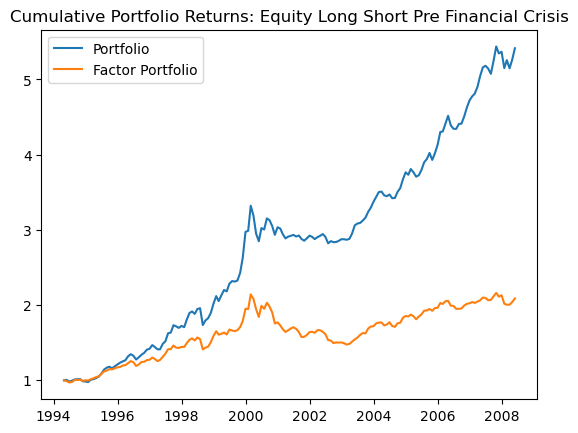

In [320]:
# Pre FC
y_ret_d1, ELS_bench_ret_d1, ELS_params_d1 = fit_period(y_ELS,X_ELS,1,"Equity Long Short")

visualise_rets(y_ELS,ELS_bench_ret_d1,1,"Equity Long Short")

                            OLS Regression Results                            
Dep. Variable:                 LnShEq   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.25e-43
Time:                        00:45:26   Log-Likelihood:                 526.81
No. Observations:                 166   AIC:                            -1034.
Df Residuals:                     156   BIC:                            -1002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.3843      0.021     18.502      0.0

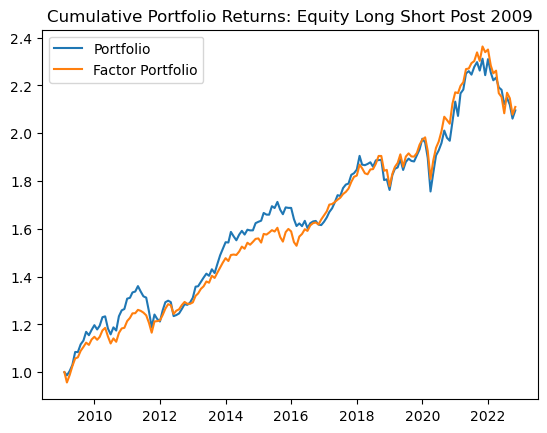

In [321]:
# Pre FC
y_ret_d1, ELS_bench_ret_d2, ELS_params_d2 = fit_period(y_ELS,X_ELS,2,"Equity Long Short")

visualise_rets(y_ELS,ELS_bench_ret_d2,2,"Equity Long Short")

In [322]:
# MktRF_L1, L2, L3 shows pvalues instead
ELS_Params = ELS_params_d1.to_frame("PFC")
ELS_Params["Post09"] = ELS_params_d2
ELS_Params.round(4)

,PFC,Post09
MktRF,0.4384,0.3843
SMB,0.2027,-0.0360
HML,-0.0087,0.0560
RMW,-0.0617,-0.0546
CMA,-0.1322,-0.1633
UMD,0.2160,0.0144
MktRF_L1,0.0017,0.0063
MktRF_L2,0.1217,0.3623
MktRF_L3,0.7044,0.4387
Intercept,0.0056,0.0002


There's a change in style; again next to No alpha


#### Short Bias

                            OLS Regression Results                            
Dep. Variable:                DedShBs   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     58.65
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.72e-46
Time:                        00:45:27   Log-Likelihood:                 397.60
No. Observations:                 170   AIC:                            -775.2
Df Residuals:                     160   BIC:                            -743.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF         -0.9155      0.060    -15.280      0.0

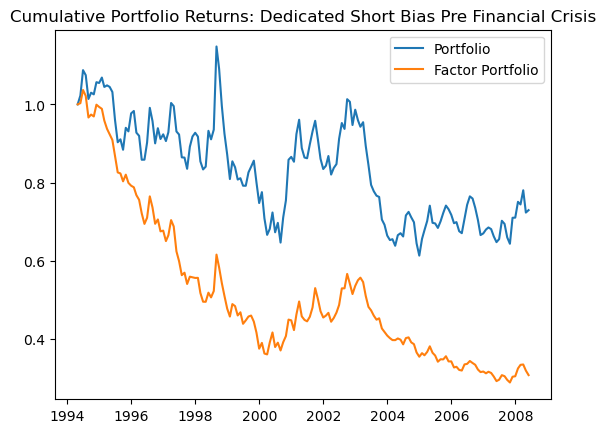

In [323]:
# Pre FC
y_ret_d1, DSB_bench_ret_d1, DSB_params_d1 = fit_period(y_DSB,X_DSB,1,"Dedicated Short Bias")

visualise_rets(y_DSB,DSB_bench_ret_d1,1,"Dedicated Short Bias")

                            OLS Regression Results                            
Dep. Variable:                DedShBs   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     40.30
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.30e-36
Time:                        00:45:27   Log-Likelihood:                 339.95
No. Observations:                 166   AIC:                            -659.9
Df Residuals:                     156   BIC:                            -628.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF         -0.9468      0.064    -14.789      0.0

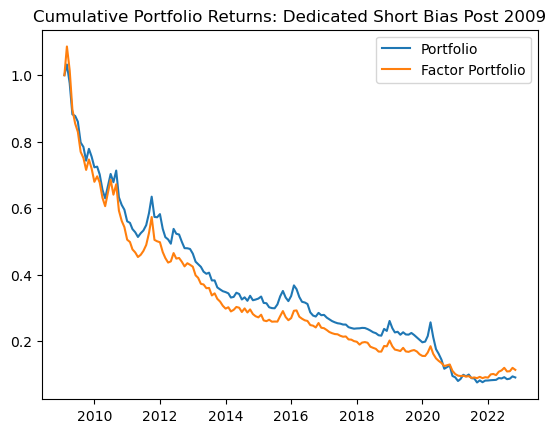

In [324]:
# Pre FC
y_ret_d2, DSB_bench_ret_d2, DSB_params_d2 = fit_period(y_DSB,X_DSB,2,"Dedicated Short Bias")

visualise_rets(y_DSB,DSB_bench_ret_d2,2,"Dedicated Short Bias")

In [325]:
# MktRF_L1, L2, L3 shows pvalues instead
DSB_Params = DSB_params_d1.to_frame("PFC")
DSB_Params["Post09"] = DSB_params_d2
DSB_Params.round(4)

,PFC,Post09
MktRF,-0.9155,-0.9468
SMB,-0.3809,-0.4497
HML,0.1643,0.3658
RMW,-0.2014,0.2498
CMA,0.1425,-0.2403
UMD,-0.0275,-0.0004
MktRF_L1,0.2701,0.1099
MktRF_L2,0.1694,0.9599
MktRF_L3,0.6105,0.5866
Intercept,0.0054,-0.0008


 style mostly the same, Momentum just disappeared, Again there's no alpha

### Global Macro 

                            OLS Regression Results                            
Dep. Variable:             GlobalMac    R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.891
Date:                Mon, 24 Feb 2025   Prob (F-statistic):            0.00341
Time:                        00:45:27   Log-Likelihood:                 371.14
No. Observations:                 170   AIC:                            -722.3
Df Residuals:                     160   BIC:                            -690.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.2332      0.070      3.331      0.0

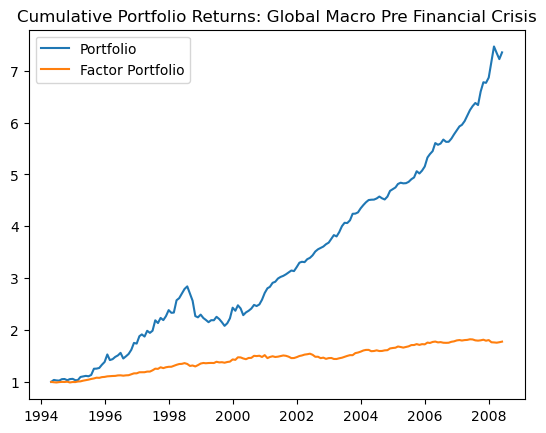

In [326]:
# Pre FC
y_ret_d1, GMC_bench_ret_d1, GMC_params_d1 = fit_period(y_GMC,X_GMC,1,"Global Macro")

visualise_rets(y_GMC,GMC_bench_ret_d1,1,"Global Macro")

                            OLS Regression Results                            
Dep. Variable:             GlobalMac    R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.764
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.30e-05
Time:                        00:45:28   Log-Likelihood:                 466.12
No. Observations:                 166   AIC:                            -912.2
Df Residuals:                     156   BIC:                            -881.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.1589      0.030      5.306      0.0

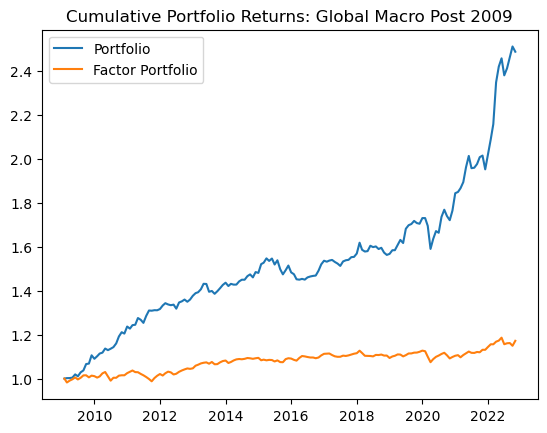

In [327]:
# Pre FC
y_ret_d2, GMC_bench_ret_d2, GMC_params_d2 = fit_period(y_GMC,X_GMC,2,"Global Macro")

visualise_rets(y_GMC,GMC_bench_ret_d2,2,"Global Macro")

In [328]:
# MktRF_L1, L2, L3 shows pvalues instead
GMC_Params = GMC_params_d1.to_frame("PFC")
GMC_Params["Post09"] = GMC_params_d2
GMC_Params.round(4)

,PFC,Post09
MktRF,0.2332,0.1589
SMB,0.0664,-0.1115
HML,0.1509,0.0949
RMW,-0.0069,-0.0304
CMA,0.0177,0.1102
UMD,0.1147,0.0481
MktRF_L1,0.8078,0.4758
MktRF_L2,0.0395,0.2925
MktRF_L3,0.7849,0.0215
Intercept,0.0087,0.0049


### Emerging markets 

                            OLS Regression Results                            
Dep. Variable:                EmgMkts   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     10.24
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.17e-12
Time:                        00:45:28   Log-Likelihood:                 328.92
No. Observations:                 170   AIC:                            -637.8
Df Residuals:                     160   BIC:                            -606.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.5815      0.090      6.479      0.0

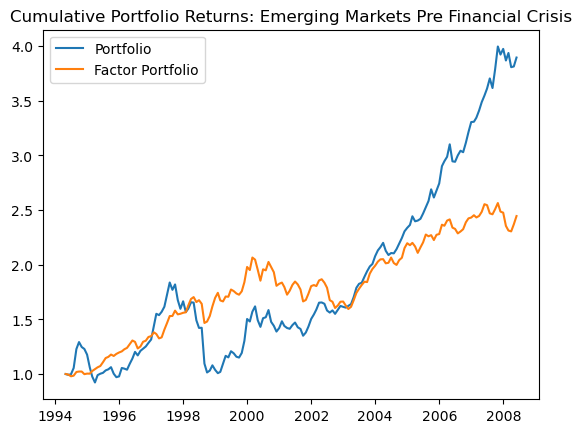

In [329]:
# Pre FC
y_ret_d1, EME_bench_ret_d1, EME_params_d1 = fit_period(y_EME,X_EME,1,"Emerging Markets")

visualise_rets(y_EME,EME_bench_ret_d1,1,"Emerging Markets")

                            OLS Regression Results                            
Dep. Variable:                EmgMkts   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.06e-19
Time:                        00:45:28   Log-Likelihood:                 442.12
No. Observations:                 166   AIC:                            -864.2
Df Residuals:                     156   BIC:                            -833.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MktRF          0.3094      0.035      8.943      0.0

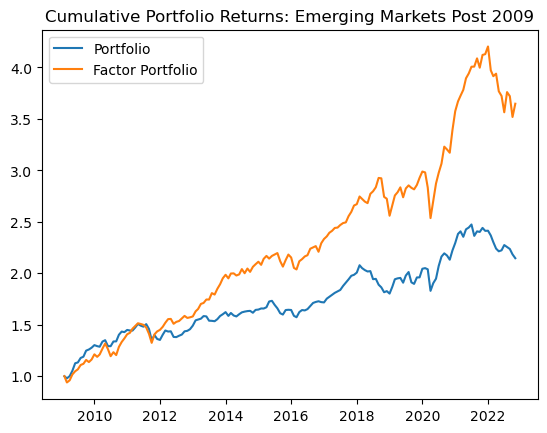

In [330]:
# Pre FC
y_ret_d1, EME_bench_ret_d2, EME_params_d2 = fit_period(y_EME,X_EME,2,"Emerging Markets")

visualise_rets(y_EME,EME_bench_ret_d1,2,"Emerging Markets")

In [331]:
# MktRF_L1, L2, L3 shows pvalues instead
EME_Params = EME_params_d1.to_frame("PFC")
EME_Params["Post09"] = EME_params_d2
EME_Params.round(4)

,PFC,Post09
MktRF,0.5815,0.3094
SMB,0.2898,0.0354
HML,-0.0229,0.0218
RMW,0.1252,-0.0866
CMA,-0.0382,-0.1327
UMD,0.1041,-0.0532
MktRF_L1,0.0575,0.0005
MktRF_L2,0.8052,0.3118
MktRF_L3,0.4526,0.4784
Intercept,0.0029,0.0005
